<a href="https://colab.research.google.com/github/danjouma/AndroidApp/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Chargement du dataset Titanic de kaggle
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Afficher les differentes colonnes du dataset
nombre=df.shape[1]
print(f"le dataset contient {nombre} colonnes")
df.columns

#le types de chaque colonne
print(df.dtypes)

le dataset contient 12 colonnes
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
#Résumé statistique du dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Fonction pour effacer les valeurs manquantes
def remove_null_columns(df, colonne, seuil=0.6):
    if colonne in df.columns:
        if df[colonne].isnull().sum() / len(df) > seuil:  # Comparaison au seuil
            df = df.drop(colonne, axis=1)
    else:
        print(f"La colonne '{colonne}' n'existe pas dans le DataFrame.")
    return df

df = remove_null_columns(df,'Cabin')
df=remove_null_columns(df,'Embarked')
df=remove_null_columns(df,'Age')
df=remove_null_columns(df,'Fare')
df=remove_null_columns(df,'PassengerId')
df=remove_null_columns(df,'Name')
df=remove_null_columns(df,'Ticket')

nbr=df.shape[1]
print(f"le dataset contient {nbr} colonnes")
df.columns
df.Survived.describe()



le dataset contient 11 colonnes


,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
#Remplir les autres valeurs manquantes par la moyenne
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())  # Remplir avec la moyenne
df.isnull().sum()





,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#Suppression des colonnes inutiles
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.drop(['Embarked'], axis=1, inplace=True)

In [9]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
#Transformation des variables catégorielles
df['Sex'] = df['Sex'].fillna('male')  # or 'female'
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0}).astype(int)



In [11]:
#Appliquer one-hot sur la colonne Pclass
df = pd.get_dummies(df, columns=['Pclass'], prefix=['Pclass']).astype(int)
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,1,22,1,0,7,0,0,1
1,1,0,38,1,0,71,1,0,0
2,1,0,26,0,0,7,0,0,1
3,1,0,35,1,0,53,1,0,0
4,0,1,35,0,0,8,0,0,1


In [12]:

df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3'],
      dtype='object')

Text(0, 0.5, 'Fréquence')

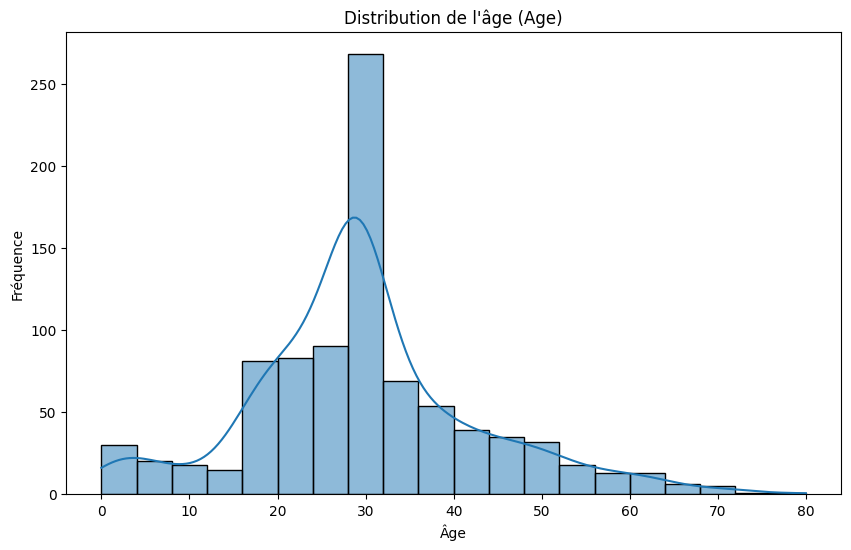

In [13]:
#Exploration graphique des données
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution des variables
#  Distribution de l'âge (Age)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'âge (Age)')
plt.xlabel('Âge')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

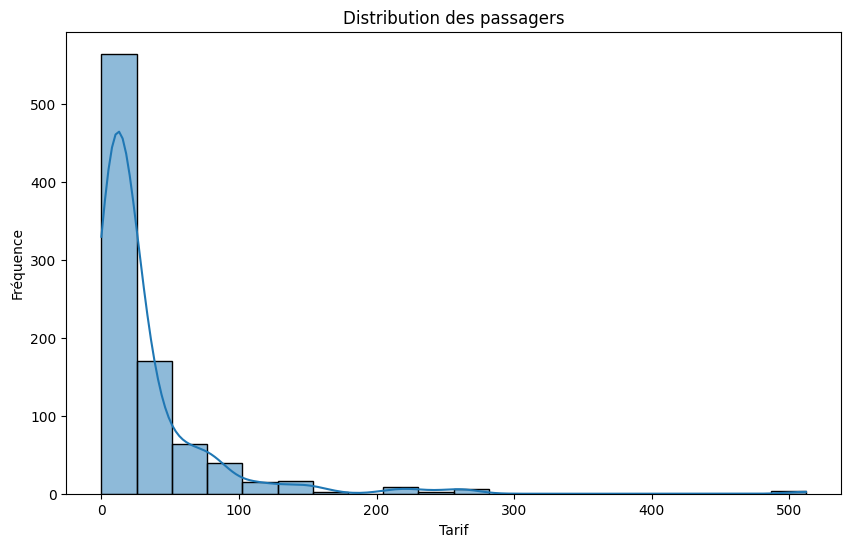

In [14]:
#distribution du tarif(Fare)
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Distribution des passagers')
plt.xlabel('Tarif')
plt.ylabel('Fréquence')

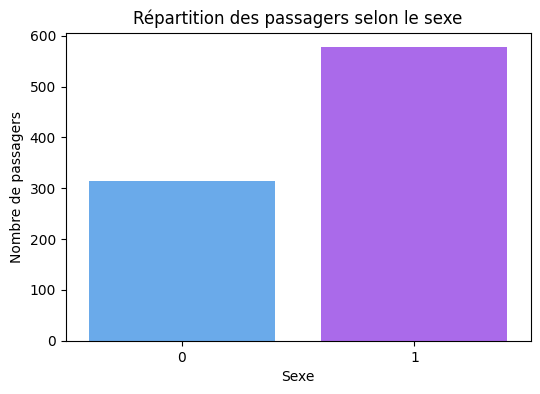

In [15]:
#Distribution selon le sexe
plt.figure(figsize=(6, 4))
sns.countplot(hue='Sex', x='Sex', data=df, palette='cool', legend=False)
plt.title('Répartition des passagers selon le sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.show()


Text(0.5, 1.0, 'Matrice de corrélation entre les variables')

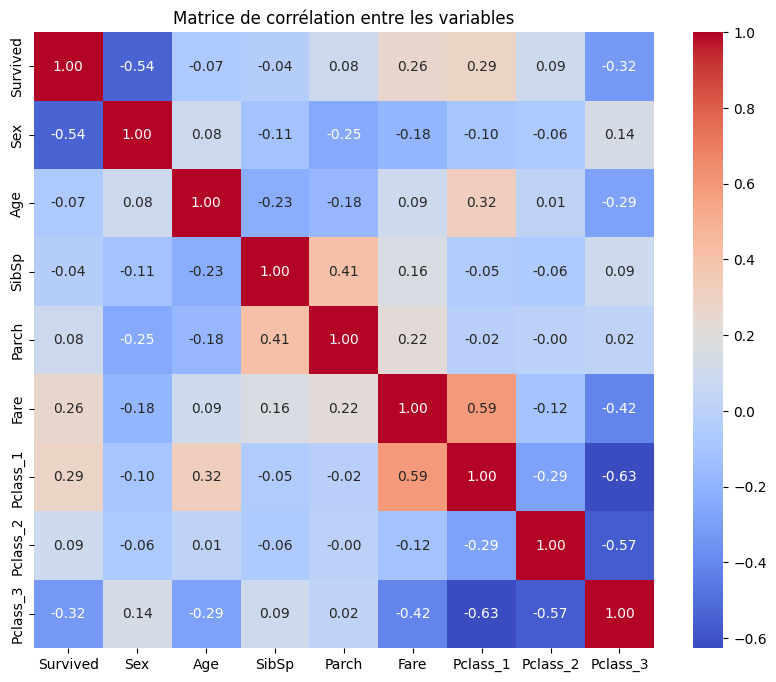

In [16]:
#Matrice de correlation entre la colonne Survived et les autres colonnes du dataset
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre les variables')


In [19]:
#Utilisation de logistic regression pour la classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Sélection des colonnes explicatives (X) et la variable cible (y)
X = df[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
y = df['Survived']
# Division des données en 80% pour l'entrainement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Initialisation du modele
model = LogisticRegression()
#Entrainement du model
model.fit(X_train, y_train)
#Prédiction sur les données de test
y_pred = model.predict(X_test)
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")




Accuracy: 0.8044692737430168
Confusion Matrix:
[[92 13]
 [22 52]]


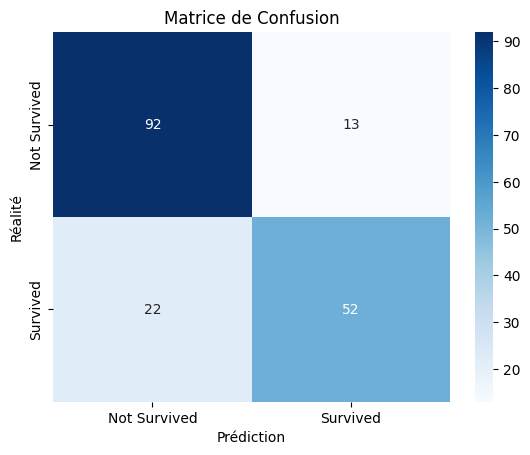

In [20]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation avec Seaborn (pour le graphique statique)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()
